In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

import os
import warnings
warnings.filterwarnings("ignore")

# setting params
params = {'legend.fontsize': 'small',
          'figure.figsize': (14, 10),
          'axes.labelsize': 'small',
          'axes.titlesize':'small',
          'xtick.labelsize':'small',
          'ytick.labelsize':'small'}


sns.set_context('talk')

plt.rcParams.update(params)
pd.options.display.max_colwidth = 600 #(long description)
pd.set_option('display.max_columns', 500)


np.set_printoptions(suppress=True)
pt = np.get_printoptions()['threshold']
#np.set_printoptions(precision=3)


pd.set_option('display.max_rows', 500)

pd.set_option('display.width', 1000)
    


In [37]:
df=pd.read_excel('state_clean_1_email.xlsx')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3531 entries, 0 to 3530
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   incident_id                   3531 non-null   object 
 1   victim                        3248 non-null   object 
 2   v_country                     3448 non-null   object 
 3   v_state                       1961 non-null   object 
 4   upper_industry                3449 non-null   object 
 5   employee_count                2278 non-null   object 
 6   incident_year                 3531 non-null   int64  
 7   notification_year             2678 non-null   float64
 8   attribute                     3531 non-null   object 
 9   compromise_variety_1          3511 non-null   object 
 10  confidentiality_victim        2509 non-null   object 
 11  confidentiality_state         2684 non-null   object 
 12  PII_binary                    57 non-null     float64
 13  SPI

In [39]:
df.keys()

Index(['incident_id', 'victim', 'v_country', 'v_state', 'upper_industry', 'employee_count', 'incident_year', 'notification_year', 'attribute', 'compromise_variety_1', 'confidentiality_victim', 'confidentiality_state', 'PII_binary', 'SPII_binary', 'data_variety', 'confidence', 'data_disclosure', 'action', 'action_variety', 'action_vector', 'discoveried_by', 'discovery_variety', 'actor_internal_job_change_0', 'motive', 'actor_country', 'actor_variety', 'data_abuse', 'credit_monitoring', 'credit_monitoring_yr', 'asset_group', 'asset_variety_1', 't_availability_duration_unit', 't_discovery_unit', 't_containment.unit', 't_exfiltration.unit', 't_compromise_unit', 'confidentiality_data_total', 'State_NonState', 'summary'], dtype='object')

In [40]:
df[['incident_year', 'notification_year']]=df[['incident_year', 'notification_year']].astype('object')

In [41]:
df.drop(columns=['incident_id','victim', 'confidentiality_victim','confidentiality_state','data_variety','discoveried_by','actor_internal_job_change_0',
               'motive','actor_country','actor_variety','data_abuse','credit_monitoring_yr','summary' ], 
        inplace=True)

In [42]:
df.head()

,v_country,v_state,upper_industry,employee_count,incident_year,notification_year,attribute,compromise_variety_1,PII_binary,SPII_binary,confidence,data_disclosure,action,action_variety,action_vector,discovery_variety,credit_monitoring,asset_group,asset_variety_1,t_availability_duration_unit,t_discovery_unit,t_containment.unit,t_exfiltration.unit,t_compromise_unit,confidentiality_data_total,State_NonState
0,US,KY,retail trade,1 to 10,2015,2016,confidentiality,fraudulent transaction,1.0,0.0,low,NaN,misuse,privilege abuse,lan access,NaN,NaN,people,NaN,0,NaN,NaN,0,0,NaN,nonstate
1,US,GA,education,1001 to 10000,2017,2018,confidentiality,alter behavior,1.0,1.0,high,yes,social,phishing,email,law enforcement,yes,server,mail,0,months,NaN,NaN,NaN,417024,nonstate
2,AZ,NaN,utilities,NaN,2013,2013,availability,loss,NaN,NaN,NaN,yes,hacking,NaN,web application,actor disclosure,NaN,server,web application,0,NaN,NaN,NaN,NaN,NaN,nonstate
3,US,PA,healthcare,NaN,2018,NaN,confidentiality,data loss,NaN,NaN,low,yes,misuse,knowledge abuse,physical access,NaN,NaN,server,database,0,days,NaN,0,minutes,1,nonstate
4,US,NE,finance and insurance,50001 to 100000,2017,2017,confidentiality,data loss,NaN,NaN,medium,yes,physical,skimmer,victim public area,customer,NaN,terminal,atm,0,NaN,NaN,NaN,NaN,NaN,nonstate


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3531 entries, 0 to 3530
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   v_country                     3448 non-null   object 
 1   v_state                       1961 non-null   object 
 2   upper_industry                3449 non-null   object 
 3   employee_count                2278 non-null   object 
 4   incident_year                 3531 non-null   object 
 5   notification_year             2678 non-null   object 
 6   attribute                     3531 non-null   object 
 7   compromise_variety_1          3511 non-null   object 
 8   PII_binary                    57 non-null     float64
 9   SPII_binary                   56 non-null     float64
 10  confidence                    1465 non-null   object 
 11  data_disclosure               3459 non-null   object 
 12  action                        3504 non-null   object 
 13  act

In [44]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [45]:
missing_values_table(df)

Your selected dataframe has 26 columns.
There are 23 columns that have missing values.


,Missing Values,% of Total Values
SPII_binary,3475,98.4
PII_binary,3474,98.4
credit_monitoring,3328,94.3
t_containment.unit,3087,87.4
t_exfiltration.unit,3072,87.0
t_compromise_unit,2935,83.1
t_discovery_unit,2589,73.3
confidence,2066,58.5
confidentiality_data_total,2031,57.5
v_state,1570,44.5


In [46]:
df.t_availability_duration_unit.value_counts()


0          3056
days         43
hours        31
never        30
weeks        12
months        9
minutes       8
years         1
Name: t_availability_duration_unit, dtype: int64

In [47]:
df.confidence.value_counts()

high      688
0         472
medium    239
low        66
Name: confidence, dtype: int64

In [48]:
df.action_vector.value_counts()

web application             632
lan access                  594
carelessness                352
physical access             267
backdoor or c2              190
email                        90
victim public area           78
victim work area             75
victim grounds               64
direct install               39
public facility              35
remote access                29
personal vehicle             24
inadequate processes         22
non-corporate                18
in-person                    15
web drive-by                 13
victim secure area           11
partner facility             10
privileged access             8
personal residence            7
random error                  6
inadequate technology         5
network propagation           5
command shell                 5
partner                       5
phone                         4
inadequate personnel          4
vpn                           4
web download                  4
public vehicle                3
software

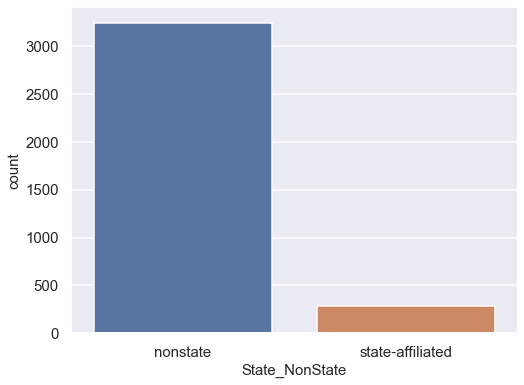

In [49]:
plt.figure(figsize=(8,6))
sns.countplot(df['State_NonState'])
plt.show()

In [50]:
df.keys()

Index(['v_country', 'v_state', 'upper_industry', 'employee_count', 'incident_year', 'notification_year', 'attribute', 'compromise_variety_1', 'PII_binary', 'SPII_binary', 'confidence', 'data_disclosure', 'action', 'action_variety', 'action_vector', 'discovery_variety', 'credit_monitoring', 'asset_group', 'asset_variety_1', 't_availability_duration_unit', 't_discovery_unit', 't_containment.unit', 't_exfiltration.unit', 't_compromise_unit', 'confidentiality_data_total', 'State_NonState'], dtype='object')

In [51]:
df.v_country.value_counts()


US     2157
GB      244
CA      175
IN       91
AU       75
NZ       43
CN       35
KR       31
IL       30
JP       30
DE       28
IE       27
RU       18
TR       18
UA       15
TW       13
PK       13
FR       13
PH       12
TH       12
BE       11
SG       11
ES       11
AE       11
SY       10
NL       10
CH        9
BR        9
ZA        9
KE        9
AR        8
IT        8
MX        7
CK        7
BD        7
PE        6
DK        6
AZ        6
MY        6
HK        6
AM        6
IR        6
EG        6
CZ        5
UM        5
KZ        5
VE        5
LT        5
PL        4
SE        4
ID        4
BY        4
EC        4
CL        4
FI        4
SA        4
VN        3
LB        3
PS        3
TM        3
AT        3
HN        3
PA        3
GA        3
JM        3
LV        3
CY        3
RO        3
ZW        2
BH        2
KH        2
BS        2
KP        2
SZ        2
CR        2
UZ        2
QA        2
ET        2
NG        2
BZ        2
IS        2
MD        2
JO        2
AF  

In [52]:
df.confidence.value_counts()

high      688
0         472
medium    239
low        66
Name: confidence, dtype: int64

In [53]:
df.head()

,v_country,v_state,upper_industry,employee_count,incident_year,notification_year,attribute,compromise_variety_1,PII_binary,SPII_binary,confidence,data_disclosure,action,action_variety,action_vector,discovery_variety,credit_monitoring,asset_group,asset_variety_1,t_availability_duration_unit,t_discovery_unit,t_containment.unit,t_exfiltration.unit,t_compromise_unit,confidentiality_data_total,State_NonState
0,US,KY,retail trade,1 to 10,2015,2016,confidentiality,fraudulent transaction,1.0,0.0,low,NaN,misuse,privilege abuse,lan access,NaN,NaN,people,NaN,0,NaN,NaN,0,0,NaN,nonstate
1,US,GA,education,1001 to 10000,2017,2018,confidentiality,alter behavior,1.0,1.0,high,yes,social,phishing,email,law enforcement,yes,server,mail,0,months,NaN,NaN,NaN,417024,nonstate
2,AZ,NaN,utilities,NaN,2013,2013,availability,loss,NaN,NaN,NaN,yes,hacking,NaN,web application,actor disclosure,NaN,server,web application,0,NaN,NaN,NaN,NaN,NaN,nonstate
3,US,PA,healthcare,NaN,2018,NaN,confidentiality,data loss,NaN,NaN,low,yes,misuse,knowledge abuse,physical access,NaN,NaN,server,database,0,days,NaN,0,minutes,1,nonstate
4,US,NE,finance and insurance,50001 to 100000,2017,2017,confidentiality,data loss,NaN,NaN,medium,yes,physical,skimmer,victim public area,customer,NaN,terminal,atm,0,NaN,NaN,NaN,NaN,NaN,nonstate


In [54]:
df.rename(columns={'v_country':'country', 'v_state':'state', 'upper_industry':'industry', 'employee_count':'n_employees',
                  'compromise_variety_1':'compromise','asset_variety_1':'asset_variety',
                  't_availability_duration_unit':'availability_duration', 't_discovery_unit':'discovery',
                  't_containment.unit':'containment', 't_exfiltration.unit':'exfiltration',
                  't_compromise_unit' :'time_compromise', 'confidentiality_data_total':'data_loss' }, inplace=True)

In [55]:
missing_values_table(df)

Your selected dataframe has 26 columns.
There are 23 columns that have missing values.


,Missing Values,% of Total Values
SPII_binary,3475,98.4
PII_binary,3474,98.4
credit_monitoring,3328,94.3
containment,3087,87.4
exfiltration,3072,87.0
time_compromise,2935,83.1
discovery,2589,73.3
confidence,2066,58.5
data_loss,2031,57.5
state,1570,44.5


In [56]:
df_dropped=df.dropna(subset=['country','industry','asset_variety'])

In [57]:
df_dropped.drop(columns=['SPII_binary','PII_binary','credit_monitoring'], inplace=True)

In [58]:
missing_values_table(df_dropped)

Your selected dataframe has 23 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
exfiltration,2518,87.2
containment,2499,86.5
time_compromise,2383,82.5
discovery,2088,72.3
confidence,1645,56.9
data_loss,1595,55.2
state,1243,43.0
discovery_variety,1129,39.1
n_employees,945,32.7
notification_year,714,24.7


In [59]:
df_dropped.exfiltration.value_counts()

0          244
minutes     65
seconds     33
hours       11
days         9
weeks        4
months       4
years        1
Name: exfiltration, dtype: int64

In [60]:
df_dropped.head()

,country,state,industry,n_employees,incident_year,notification_year,attribute,compromise,confidence,data_disclosure,action,action_variety,action_vector,discovery_variety,asset_group,asset_variety,availability_duration,discovery,containment,exfiltration,time_compromise,data_loss,State_NonState
1,US,GA,education,1001 to 10000,2017,2018,confidentiality,alter behavior,high,yes,social,phishing,email,law enforcement,server,mail,0,months,NaN,NaN,NaN,417024,nonstate
2,AZ,NaN,utilities,NaN,2013,2013,availability,loss,NaN,yes,hacking,NaN,web application,actor disclosure,server,web application,0,NaN,NaN,NaN,NaN,NaN,nonstate
3,US,PA,healthcare,NaN,2018,NaN,confidentiality,data loss,low,yes,misuse,knowledge abuse,physical access,NaN,server,database,0,days,NaN,0,minutes,1,nonstate
4,US,NE,finance and insurance,50001 to 100000,2017,2017,confidentiality,data loss,medium,yes,physical,skimmer,victim public area,customer,terminal,atm,0,NaN,NaN,NaN,NaN,NaN,nonstate
5,US,OH,government,101 to 1000,2015,2015,confidentiality,data loss,NaN,yes,error,omission,NaN,customer,media,disk media,0,NaN,NaN,NaN,NaN,30,nonstate


In [61]:
df_dropped.shape

(2889, 23)

In [62]:
df_dropped['n_year']=df_dropped['notification_year'].fillna(df_dropped['incident_year']).astype('object')

In [63]:
df_dropped.head()

,country,state,industry,n_employees,incident_year,notification_year,attribute,compromise,confidence,data_disclosure,action,action_variety,action_vector,discovery_variety,asset_group,asset_variety,availability_duration,discovery,containment,exfiltration,time_compromise,data_loss,State_NonState,n_year
1,US,GA,education,1001 to 10000,2017,2018,confidentiality,alter behavior,high,yes,social,phishing,email,law enforcement,server,mail,0,months,NaN,NaN,NaN,417024,nonstate,2018
2,AZ,NaN,utilities,NaN,2013,2013,availability,loss,NaN,yes,hacking,NaN,web application,actor disclosure,server,web application,0,NaN,NaN,NaN,NaN,NaN,nonstate,2013
3,US,PA,healthcare,NaN,2018,NaN,confidentiality,data loss,low,yes,misuse,knowledge abuse,physical access,NaN,server,database,0,days,NaN,0,minutes,1,nonstate,2018
4,US,NE,finance and insurance,50001 to 100000,2017,2017,confidentiality,data loss,medium,yes,physical,skimmer,victim public area,customer,terminal,atm,0,NaN,NaN,NaN,NaN,NaN,nonstate,2017
5,US,OH,government,101 to 1000,2015,2015,confidentiality,data loss,NaN,yes,error,omission,NaN,customer,media,disk media,0,NaN,NaN,NaN,NaN,30,nonstate,2015


In [64]:
df_dropped.keys()

Index(['country', 'state', 'industry', 'n_employees', 'incident_year', 'notification_year', 'attribute', 'compromise', 'confidence', 'data_disclosure', 'action', 'action_variety', 'action_vector', 'discovery_variety', 'asset_group', 'asset_variety', 'availability_duration', 'discovery', 'containment', 'exfiltration', 'time_compromise', 'data_loss', 'State_NonState', 'n_year'], dtype='object')

In [66]:
df_eda=df_dropped[['country', 'state', 'industry', 'n_employees', 'incident_year', 'notification_year','n_year',
                   'attribute', 
                   'compromise', 'confidence', 'data_disclosure', 'action', 'action_variety', 'action_vector', 
                   'discovery_variety', 'asset_group', 'asset_variety', 'availability_duration', 'discovery',
                   'containment', 'exfiltration', 'time_compromise', 
                   'data_loss', 'State_NonState', ]]

In [67]:
df_eda.head()

,country,state,industry,n_employees,incident_year,notification_year,n_year,attribute,compromise,confidence,data_disclosure,action,action_variety,action_vector,discovery_variety,asset_group,asset_variety,availability_duration,discovery,containment,exfiltration,time_compromise,data_loss,State_NonState
1,US,GA,education,1001 to 10000,2017,2018,2018,confidentiality,alter behavior,high,yes,social,phishing,email,law enforcement,server,mail,0,months,NaN,NaN,NaN,417024,nonstate
2,AZ,NaN,utilities,NaN,2013,2013,2013,availability,loss,NaN,yes,hacking,NaN,web application,actor disclosure,server,web application,0,NaN,NaN,NaN,NaN,NaN,nonstate
3,US,PA,healthcare,NaN,2018,NaN,2018,confidentiality,data loss,low,yes,misuse,knowledge abuse,physical access,NaN,server,database,0,days,NaN,0,minutes,1,nonstate
4,US,NE,finance and insurance,50001 to 100000,2017,2017,2017,confidentiality,data loss,medium,yes,physical,skimmer,victim public area,customer,terminal,atm,0,NaN,NaN,NaN,NaN,NaN,nonstate
5,US,OH,government,101 to 1000,2015,2015,2015,confidentiality,data loss,NaN,yes,error,omission,NaN,customer,media,disk media,0,NaN,NaN,NaN,NaN,30,nonstate


In [123]:
#df_eda.to_csv('veris_eda.csv', index=False)

In [68]:
df_us=df_eda[df_eda['country']=='US']

In [69]:
df_us.head()

,country,state,industry,n_employees,incident_year,notification_year,n_year,attribute,compromise,confidence,data_disclosure,action,action_variety,action_vector,discovery_variety,asset_group,asset_variety,availability_duration,discovery,containment,exfiltration,time_compromise,data_loss,State_NonState
1,US,GA,education,1001 to 10000,2017,2018,2018,confidentiality,alter behavior,high,yes,social,phishing,email,law enforcement,server,mail,0,months,NaN,NaN,NaN,417024,nonstate
3,US,PA,healthcare,NaN,2018,NaN,2018,confidentiality,data loss,low,yes,misuse,knowledge abuse,physical access,NaN,server,database,0,days,NaN,0,minutes,1,nonstate
4,US,NE,finance and insurance,50001 to 100000,2017,2017,2017,confidentiality,data loss,medium,yes,physical,skimmer,victim public area,customer,terminal,atm,0,NaN,NaN,NaN,NaN,NaN,nonstate
5,US,OH,government,101 to 1000,2015,2015,2015,confidentiality,data loss,NaN,yes,error,omission,NaN,customer,media,disk media,0,NaN,NaN,NaN,NaN,30,nonstate
8,US,NaN,retail trade,1 to 10,2017,NaN,2017,integrity,hardware tampering,high,yes,physical,skimmer,victim public area,customer,terminal,gas terminal,0,minutes,NaN,NaN,minutes,NaN,nonstate


In [70]:
df_us.drop(columns='country', inplace=True)

In [71]:
#df_us.to_csv('veris_us.csv', index=False)